In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [8]:
movies = pd.read_csv('HW.csv', encoding = 'latin1')

In [9]:
movies.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day of Week               608 non-null object
Director                  608 non-null object
Genre                     608 non-null object
Movie Title               608 non-null object
Release Date              608 non-null object
Studio                    608 non-null object
Adjusted Gross ($mill)    608 non-null object
Budget ($mill)            608 non-null float64
Gross ($mill)             608 non-null object
IMDb Rating               608 non-null float64
MovieLens Rating          608 non-null float64
Overseas ($mill)          608 non-null object
Overseas%                 608 non-null float64
Profit ($mill)            608 non-null object
Profit%                   608 non-null float64
Runtime (min)             608 non-null int64
US ($mill)                608 non-null float64
Gross % US                608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ 

In [11]:
genre_filter = ['animation', 'adventure', 'comedy', 'action', 'drama']
studio_filter = ['Buena Vista Studios', 'WB', 'Paramount Pictures', 'Sony', 'Universal', 'Fox']

In [12]:
df1 = movies[movies.Genre.isin(genre_filter)]

In [13]:
df1.Genre.unique()

array(['action', 'comedy', 'adventure', 'animation', 'drama'], dtype=object)

In [14]:
df = df1[df1.Studio.isin(studio_filter)]

In [15]:
df.Studio.unique()

array(['Buena Vista Studios', 'Sony', 'Universal', 'WB',
       'Paramount Pictures', 'Fox'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 606
Data columns (total 18 columns):
Day of Week               423 non-null object
Director                  423 non-null object
Genre                     423 non-null object
Movie Title               423 non-null object
Release Date              423 non-null object
Studio                    423 non-null object
Adjusted Gross ($mill)    423 non-null object
Budget ($mill)            423 non-null float64
Gross ($mill)             423 non-null object
IMDb Rating               423 non-null float64
MovieLens Rating          423 non-null float64
Overseas ($mill)          423 non-null object
Overseas%                 423 non-null float64
Profit ($mill)            423 non-null object
Profit%                   423 non-null float64
Runtime (min)             423 non-null int64
US ($mill)                423 non-null float64
Gross % US                423 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 62.8+ 

In [20]:
df.Genre = df.Genre.astype('category')
df.Studio = df.Studio.astype('category')

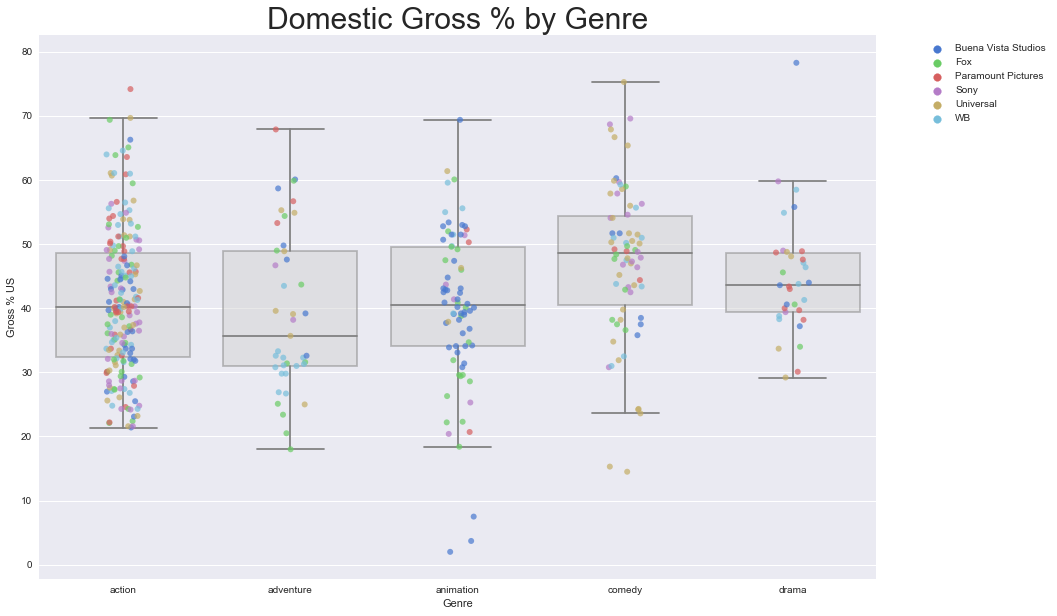

In [28]:
sns.set(style = 'darkgrid', palette = 'muted', color_codes = True)
ax = sns.boxplot(data = df, x = 'Genre', y = 'Gross % US', color = 'lightgray', showfliers = False)
plt.setp(ax.artists, alpha = 0.5)

sns.stripplot(data = df, x = 'Genre', y = 'Gross % US', jitter = True, size = 6, linewidth = 0, hue = 'Studio', 
              alpha = 0.7)

plt.rcParams['figure.figsize'] = 15, 10

ax.axes.set_title('Domestic Gross % by Genre', fontsize = 30)
ax.set_xlabel('')
ax.legend(bbox_to_anchor = (1.05, 1), loc = 2)